# Question 1

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
car_df=pd.read_csv('C:/Users/nicky/Downloads/Cars (2) (1).csv')

In [3]:
# Checking head of dataset
car_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
# Summary of dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [5]:
# Checking for null values
car_df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [6]:
# Checking for duplicates
car_df.duplicated().sum()

0

In [7]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


# Univariate Analysis

In [8]:
# Checking for unique values for each variable to differentiate them inti categorical and continuous variables
car_df['Age'].unique()

array([28, 23, 29, 27, 26, 22, 25, 24, 32, 34, 30, 20, 33, 21, 31, 19, 39,
       36, 35, 38, 40, 18, 37, 42, 43], dtype=int64)

In [9]:
car_df['Engineer'].unique()

array([0, 1], dtype=int64)

In [10]:
car_df['MBA'].unique()

array([0, 1], dtype=int64)

In [11]:
car_df['Work Exp'].unique()

array([ 4,  7,  5,  3,  1,  2,  9, 13,  6,  8,  0, 11, 10, 19, 16, 12, 21,
       17, 14, 18, 15, 20, 22, 24], dtype=int64)

In [12]:
car_df['license'].unique()

array([0, 1], dtype=int64)

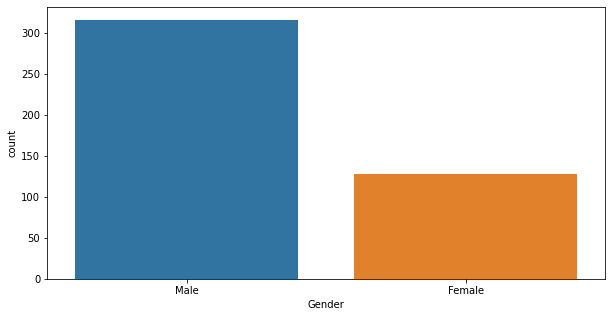

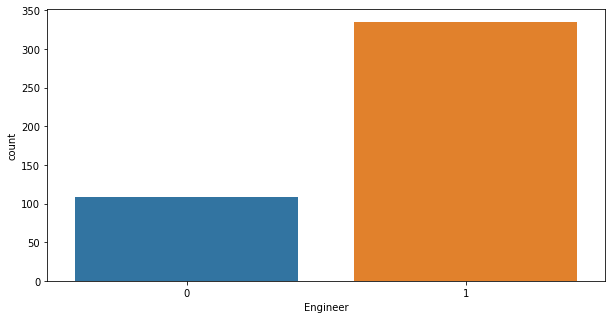

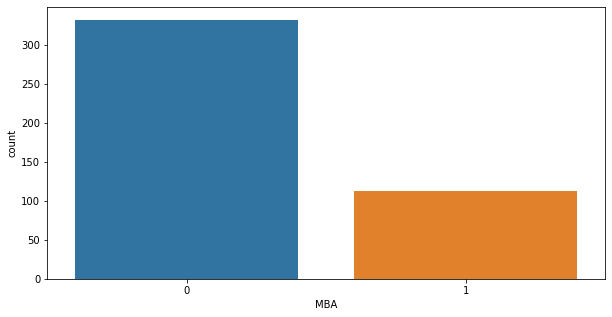

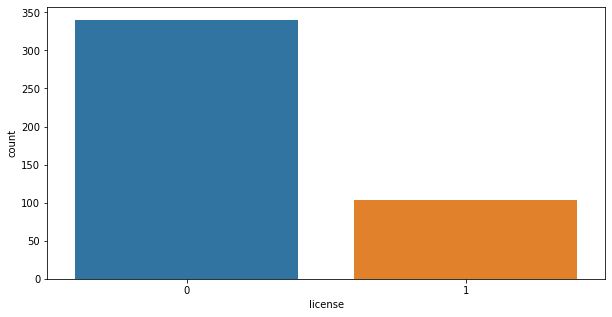

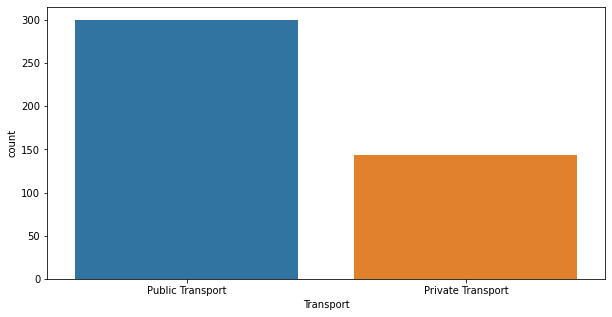

In [13]:
# plotting categorical variables

col1=['Gender','Engineer','MBA','license','Transport']
for i in col1:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=car_df)

Age
Skewness :  0.9552759761192868
kurtosis :  0.9388711328850645
Salary
Skewness :  2.0445329291548857
kurtosis :  3.479376931422676
Work Exp
Skewness :  1.3528403114201042
kurtosis :  1.4785733585322038
Distance
Skewness :  0.5398513071476282
kurtosis :  0.19146510525849614


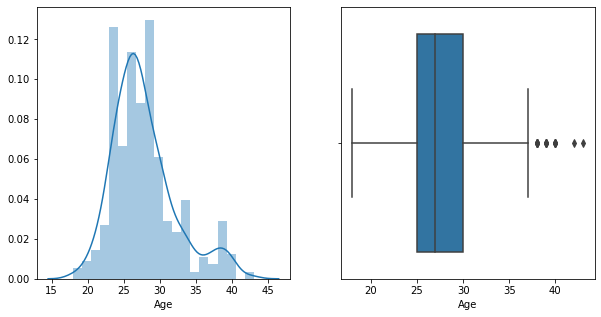

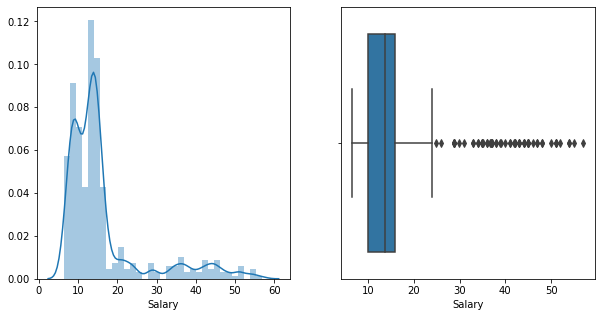

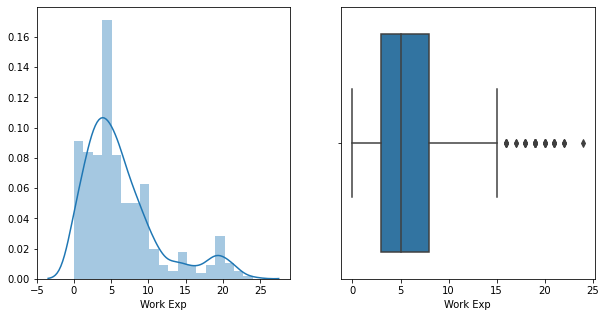

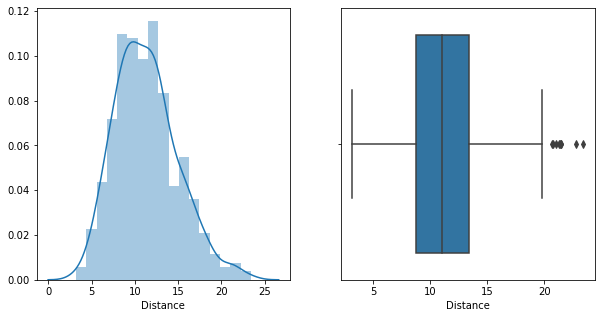

In [14]:
# Plotting continuous variables
for cols in ['Age','Salary','Work Exp','Distance']:
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.distplot(car_df[cols],ax=axes[0])
    sns.boxplot(car_df[cols],ax=axes[1])
    print(cols)
    print('Skewness : ',car_df[cols].skew())
    print('kurtosis : ' ,car_df[cols].kurt())
    

In [15]:
# Correcting outliers by using IQR 
def detect_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range


In [16]:
lr,ur=detect_outliers(car_df['Age'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  17.5 upper range-  37.5


In [17]:
car_df['Age']=np.where(car_df['Age']>ur,ur,car_df['Age'])
car_df['Age']=np.where(car_df['Age']<lr,lr,car_df['Age'])

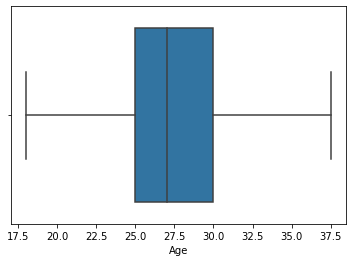

In [18]:
sns.boxplot(car_df['Age']);

skewness:  1.0304622089952944
kurtosis:  0.6356036576923758


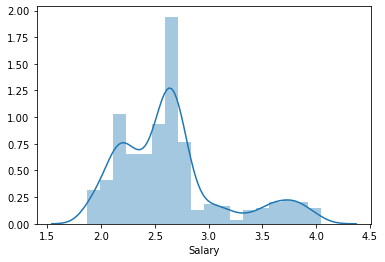

In [19]:
sns.distplot(np.log(car_df['Salary']))
print('skewness: ',np.log(car_df['Salary']).skew())
print('kurtosis: ',np.log(car_df['Salary']).kurt())

In [20]:
lr,ur=detect_outliers(car_df['Salary'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  0.912500000000005 upper range-  24.612499999999994


In [21]:
car_df['Salary']=np.where(car_df['Salary']>ur,ur,car_df['Salary'])
car_df['Salary']=np.where(car_df['Salary']<lr,lr,car_df['Salary'])

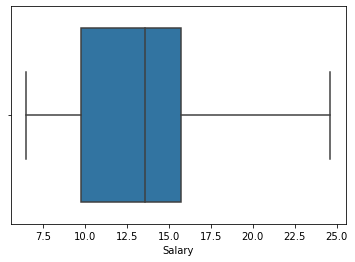

In [22]:
sns.boxplot(car_df['Salary']);

In [23]:
lr,ur=detect_outliers(car_df['Distance'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  1.8625000000000007 upper range-  20.3625


In [24]:
car_df['Distance']=np.where(car_df['Distance']>ur,ur,car_df['Distance'])
car_df['Distance']=np.where(car_df['Distance']<lr,lr,car_df['Distance'])

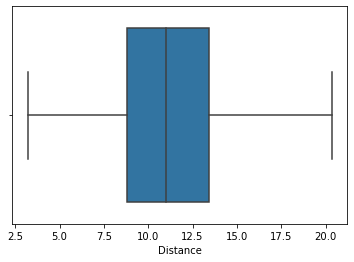

In [25]:
sns.boxplot(car_df['Distance']);

In [26]:
lr,ur=detect_outliers(car_df['Work Exp'])
print('lower range- ',lr,'upper range- ',ur)

lower range-  -4.5 upper range-  15.5


In [27]:
car_df['Work Exp']=np.where(car_df['Work Exp']>ur,ur,car_df['Work Exp'])
car_df['Work Exp']=np.where(car_df['Work Exp']<lr,lr,car_df['Work Exp'])

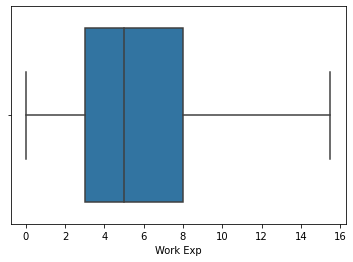

In [28]:
sns.boxplot(car_df['Work Exp']);

# Bivariate Analysis

1) Categorical variables

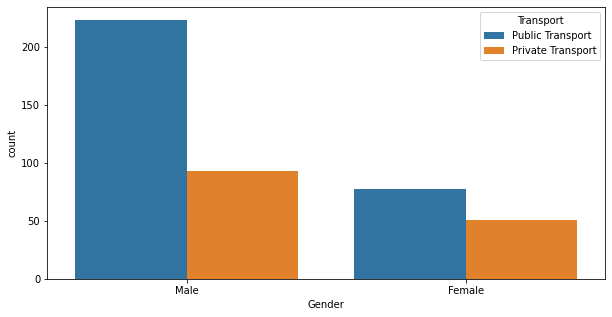

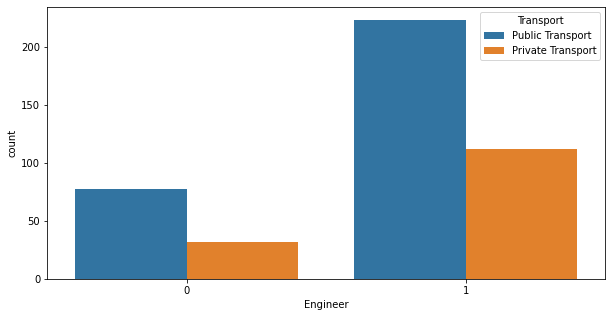

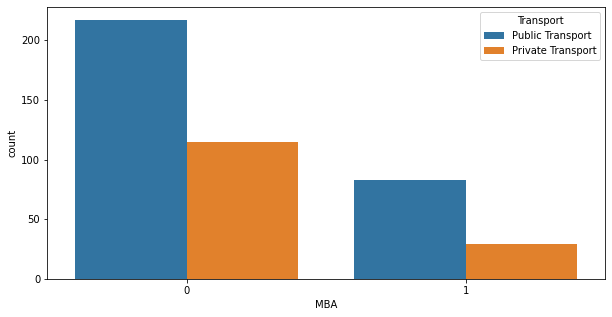

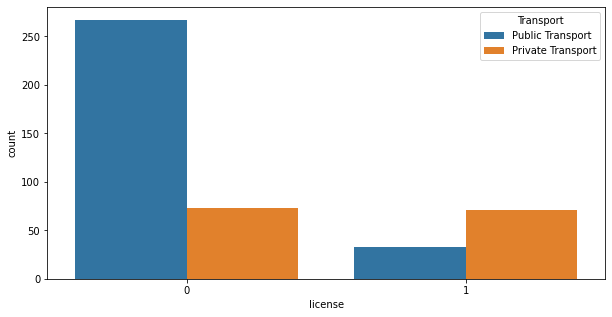

In [29]:
# Plotting countplots for categorical variables
for cols in ['Gender','Engineer','MBA','license']:
    fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
    sns.countplot(car_df[cols],hue=car_df['Transport'])
    

2) Continuous variables

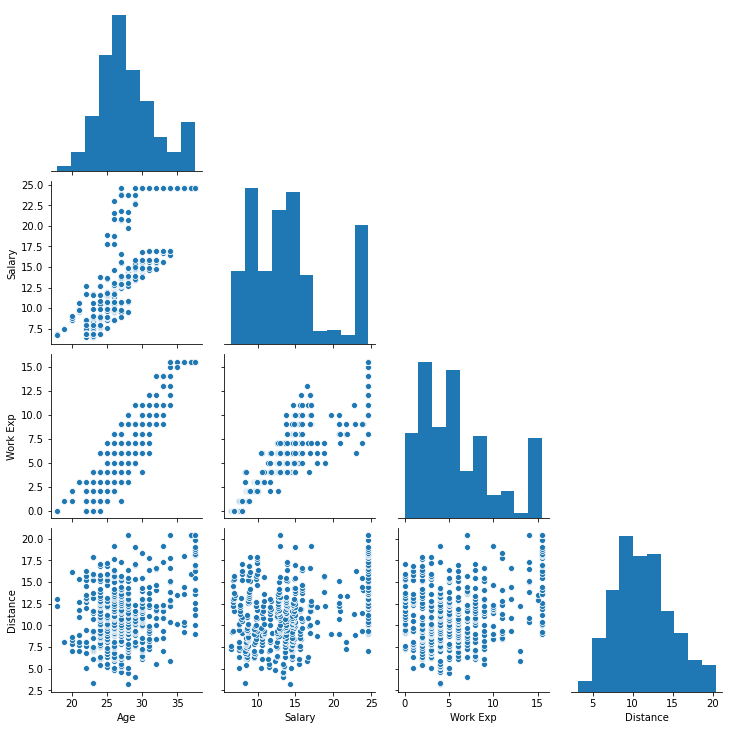

In [30]:
# Plotting pair plot for continuous variables
cols=['Age','Salary','Work Exp','Distance']
sns.pairplot(data=car_df[cols],corner=True);

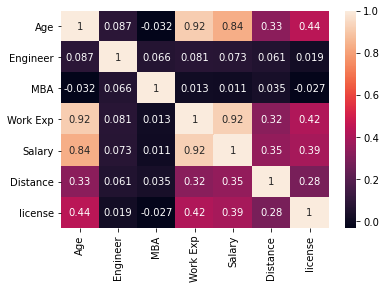

In [31]:
# Plotting heatmap for correlations of different continuous variables
sns.heatmap(car_df.corr(),annot=True);

# 1.2

In [32]:
# Encoding
car_df['Gender']=pd.Categorical(car_df['Gender']).codes
car_df['Transport']=pd.Categorical(car_df['Transport']).codes

In [33]:
car_df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,0,0,4.0,14.3,3.2,0,1
1,23.0,0,1,0,4.0,8.3,3.3,0,1
2,29.0,1,1,0,7.0,13.4,4.1,0,1
3,28.0,0,1,1,5.0,13.4,4.5,0,1
4,27.0,1,1,0,4.0,13.4,4.6,0,1


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# separating independent variables into x and dependent variables into y
x=car_df.drop('Transport',axis=1)
y=car_df.pop('Transport')

In [36]:
# Splitting data into train and test det
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

# 1.3)

# Logistic regression model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics

In [38]:
# Initializing the model
lr_model=LogisticRegression()

In [39]:
# Fitting training set into the model
lr_model.fit(x_train,y_train)

LogisticRegression()

In [40]:
# Predicting on train and test set
lr_train_predict=lr_model.predict(x_train)
lr_test_predict=lr_model.predict(x_test)

In [41]:
# Classification report of train set
print(classification_report(y_train,lr_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.57      0.66       102
           1       0.81      0.92      0.86       208

    accuracy                           0.81       310
   macro avg       0.80      0.75      0.76       310
weighted avg       0.80      0.81      0.80       310



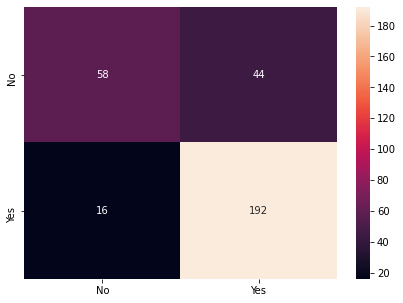

In [42]:
# Confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=lr_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [43]:
# Classification report of test set
print(classification_report(y_test,lr_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        42
           1       0.84      0.87      0.86        92

    accuracy                           0.80       134
   macro avg       0.77      0.76      0.76       134
weighted avg       0.80      0.80      0.80       134



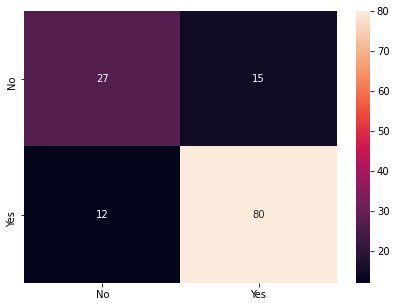

In [44]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=lr_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [45]:
# CALculating probabilities
lr_train_prob=lr_model.predict_proba(x_train)
lr_test_prob=lr_model.predict_proba(x_test)

In [46]:
# AUC Score of train set
lr_model_train_auc=roc_auc_score(y_train,lr_train_prob[:,1])
lr_model_train_auc


0.8331447963800905

In [47]:
# AUC Score of test set
lr_model_test_auc=roc_auc_score(y_test,lr_test_prob[:,1])
lr_model_test_auc


0.809265010351967

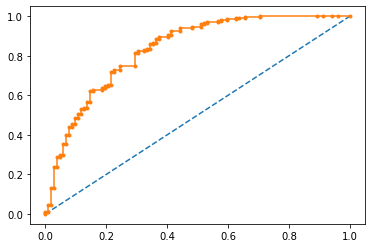

In [48]:
#ROC-AUC Curve of train set
lr_model_train_fpr,lr_model_train_tpr,thresholds=roc_curve(y_train,lr_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_model_train_fpr,lr_model_train_tpr,marker='.')
plt.show()


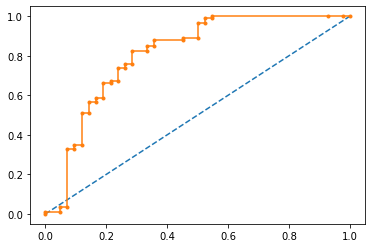

In [49]:
#ROC-AUC curve of test set
lr_model_test_fpr,lr_model_test_tpr,thresholds=roc_curve(y_test,lr_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_model_test_fpr,lr_model_test_tpr,marker='.')
plt.show()


# Linear Discriminant Analysis

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
# Initializing LDA Model
lda_model=LinearDiscriminantAnalysis()

In [52]:
# Fitting train data into the model
lda_model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [53]:
# Prediction using train set and test set
lda_train_predict=lda_model.predict(x_train)
lda_test_predict=lda_model.predict(x_test)

In [54]:
# Classification report of train set
print(classification_report(y_train,lda_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68       102
           1       0.82      0.92      0.87       208

    accuracy                           0.81       310
   macro avg       0.80      0.76      0.77       310
weighted avg       0.81      0.81      0.81       310



In [55]:
# Classification report of test set
print(classification_report(y_test,lda_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        42
           1       0.82      0.88      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.73      0.74       134
weighted avg       0.78      0.78      0.78       134



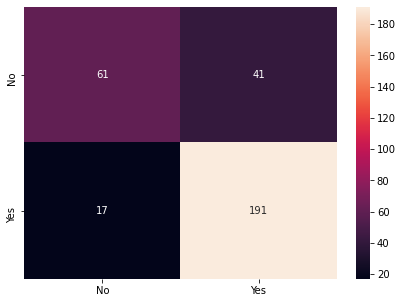

In [56]:
# Confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=lda_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

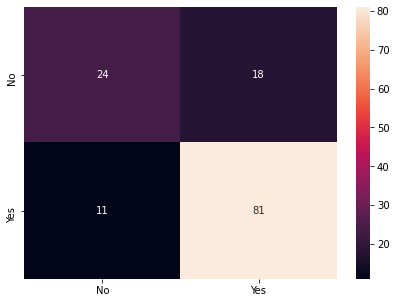

In [57]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=lda_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [58]:
# Calculating proabilities
lda_train_prob=lda_model.predict_proba(x_train)
lda_test_prob=lda_model.predict_proba(x_test)

In [59]:
# AUC Score of train set
lda_model_train_auc=roc_auc_score(y_train,lda_train_prob[:,1])
lda_model_train_auc


0.8330033936651584

In [60]:
# AUC Score of test set
lda_model_test_auc=roc_auc_score(y_test,lda_test_prob[:,1])
lda_model_test_auc

0.8015010351966874

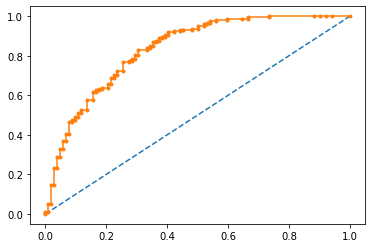

In [61]:
#ROC-AUC Curve of train set
lda_model_train_fpr,lda_model_train_tpr,thresholds=roc_curve(y_train,lda_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_model_train_fpr,lda_model_train_tpr,marker='.')
plt.show()


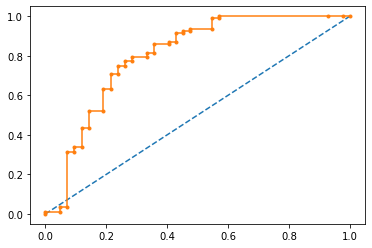

In [62]:
#ROC-AUC Curve of test set
lda_model_test_fpr,lda_model_test_tpr,thresholds=roc_curve(y_test,lda_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_model_test_fpr,lda_model_test_tpr,marker='.')
plt.show()


# Naive Bayes Model

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
# Initializing the model
nb_model=GaussianNB()

In [65]:
# Fitting train and test set into the model
nb_model.fit(x_train,y_train)

GaussianNB()

In [66]:
#Predicting on train and test set
nb_train_predict=nb_model.predict(x_train)
nb_test_predict=nb_model.predict(x_test)

In [67]:
# Classification report of train set
print(classification_report(y_train,nb_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       102
           1       0.80      0.87      0.83       208

    accuracy                           0.76       310
   macro avg       0.74      0.71      0.72       310
weighted avg       0.76      0.76      0.76       310



In [68]:
#Classification report of test set
print(classification_report(y_test,nb_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65        42
           1       0.84      0.85      0.84        92

    accuracy                           0.78       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.78      0.78      0.78       134



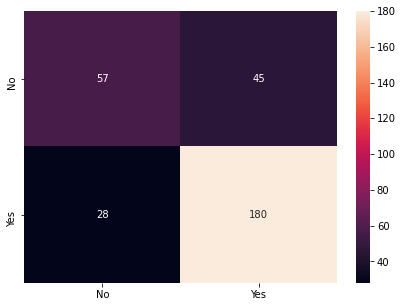

In [69]:
# Confusion report of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=nb_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

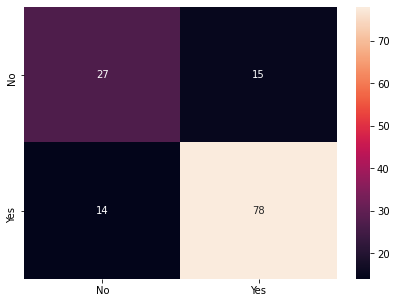

In [70]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=nb_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [71]:
# Calculating probabilities
nb_train_prob=nb_model.predict_proba(x_train)
nb_test_prob=nb_model.predict_proba(x_test)

In [72]:
# AUC Score of train set
nb_model_train_auc=roc_auc_score(y_train,nb_train_prob[:,1])
nb_model_train_auc


0.7909125188536954

In [73]:
# AUC Score of test set
nb_model_test_auc=roc_auc_score(y_test,nb_test_prob[:,1])
nb_model_test_auc


0.7862318840579711

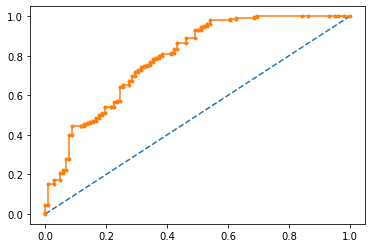

In [74]:
#ROC-AUC Curve of train set
nb_model_train_fpr,nb_model_train_tpr,thresholds=roc_curve(y_train,nb_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_model_train_fpr,nb_model_train_tpr,marker='.')
plt.show()


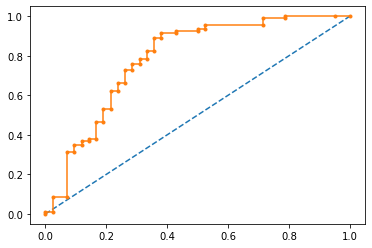

In [75]:
#ROC-AUC Curve of test set
nb_model_test_fpr,nb_model_test_tpr,thresholds=roc_curve(y_test,nb_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_model_test_fpr,nb_model_test_tpr,marker='.')
plt.show()


# KNN Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
# Initializing the model by using nearest neighbor=5
knn_model=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [78]:
# Fitting train set into the model
knn_model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [79]:
# Predicting on train and test set
knn_train_predict=knn_model.predict(x_train)
knn_test_predict=knn_model.predict(x_test)

In [80]:
#Classification report of train set
print(classification_report(y_train,knn_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



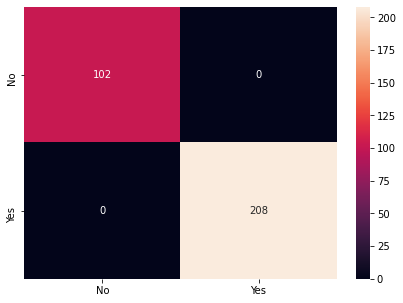

In [81]:
# confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=knn_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [82]:
# Classification report of test set
print(classification_report(y_test,knn_test_predict))

              precision    recall  f1-score   support

           0       0.61      0.55      0.57        42
           1       0.80      0.84      0.82        92

    accuracy                           0.75       134
   macro avg       0.70      0.69      0.70       134
weighted avg       0.74      0.75      0.74       134



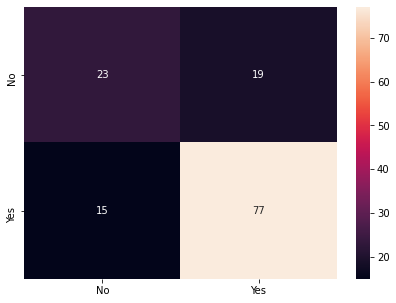

In [83]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=knn_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [84]:
# Calculating proabilities
knn_train_prob=knn_model.predict_proba(x_train)
knn_test_prob=knn_model.predict_proba(x_test)

In [85]:
# AUC Score of train set
knn_model_train_auc=roc_auc_score(y_train,knn_train_prob[:,1])
knn_model_train_auc


1.0

In [86]:
# AUC Score of test set
knn_model_test_auc=roc_auc_score(y_test,knn_test_prob[:,1])
knn_model_test_auc

0.8048654244306418

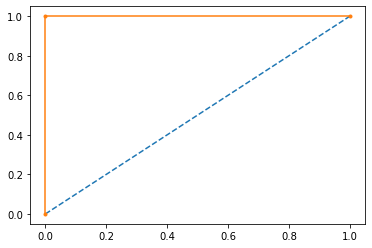

In [87]:
#ROC-AUC Curve of train set
knn_model_train_fpr,knn_model_train_tpr,thresholds=roc_curve(y_train,knn_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_model_train_fpr,knn_model_train_tpr,marker='.')
plt.show()


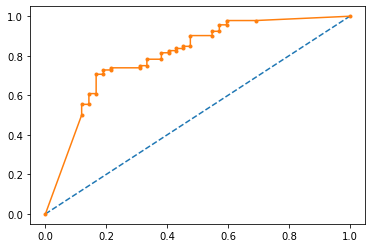

In [88]:
#ROC-AUC Curve of test set
knn_model_test_fpr,knn_model_test_tpr,thresholds=roc_curve(y_test,knn_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_model_test_fpr,knn_model_test_tpr,marker='.')
plt.show()


# Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# Initializing the model
gbc=GradientBoostingClassifier(n_estimators=50,random_state=1)

In [91]:
# Fitting train set into the model
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [92]:
# Predicting on train and test set
gb_train_predict=gbc.predict(x_train)
gb_test_predict=gbc.predict(x_test)

In [93]:
# Classification report of train set
print(classification_report(y_train,gb_train_predict))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87       102
           1       0.91      0.98      0.94       208

    accuracy                           0.92       310
   macro avg       0.93      0.89      0.90       310
weighted avg       0.92      0.92      0.92       310



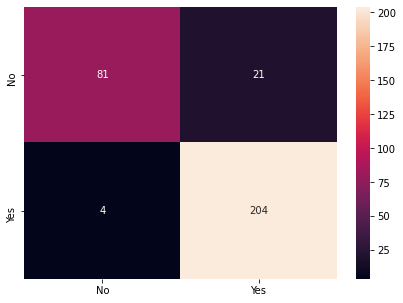

In [94]:
# Confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=gb_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [95]:
# Classification report of test set
print(classification_report(y_test,gb_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        42
           1       0.83      0.90      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.80      0.81      0.80       134



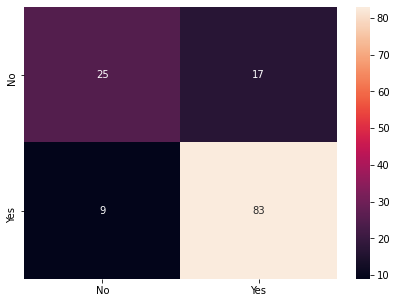

In [96]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=gb_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [97]:
# Calculating prabilities
gb_train_prob=gbc.predict_proba(x_train)
gb_test_prob=gbc.predict_proba(x_test)

In [98]:
# AUC Score of train set
gbc_train_auc=roc_auc_score(y_train,gb_train_prob[:,1])
gbc_train_auc


0.9804864253393665

In [99]:
#AUC Score of test set
gbc_test_auc=roc_auc_score(y_test,gb_test_prob[:,1])
gbc_test_auc


0.8093944099378882

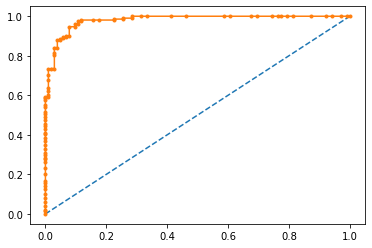

In [100]:
#ROC-AUC Curve of train set
gbc_train_fpr,gbc_train_tpr,thresholds=roc_curve(y_train,gb_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gbc_train_fpr,gbc_train_tpr,marker='.')
plt.show()


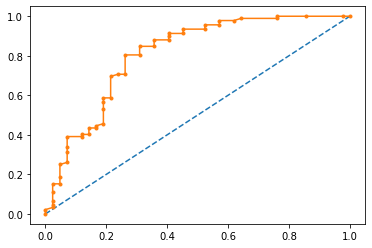

In [101]:
#ROC-AUC Curve of test set
gbc_test_fpr,gbc_test_tpr,thresholds=roc_curve(y_test,gb_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gbc_test_fpr,gbc_test_tpr,marker='.')
plt.show()


# Cart Model

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Initializing the model
dt_model=DecisionTreeClassifier(criterion='gini')

In [104]:
# Fitting train set into the model
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
from sklearn import tree

In [106]:
# creating descision tree
train_char_label=['No','Yes']
car_tree_file=open('C:\\Users\\nicky\\car_tree.dot','w')

In [107]:
dot_data=tree.export_graphviz(dt_model,
                               out_file=car_tree_file, 
                               feature_names=list(x_train),
                              class_names=list(train_char_label))

In [108]:
car_tree_file.close()

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid={'max_depth':[8,9,10],
           'min_samples_leaf':[20,25,30],
           'min_samples_split':[40,50,60],}

In [111]:
grid_search=GridSearchCV(estimator=dt_model ,param_grid=param_grid, cv=3)

In [112]:
# Fitting train set into grid search
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [20, 25, 30],
                         'min_samples_split': [40, 50, 60]})

In [113]:
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 40}


In [114]:
best_grid=grid_search.best_estimator_


In [115]:
# predicting on train and test set
cart_train_predict=best_grid.predict(x_train)
cart_test_predict=best_grid.predict(x_test)

In [116]:
# Classification report of train set
print(classification_report(y_train,cart_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.62      0.68       102
           1       0.83      0.91      0.87       208

    accuracy                           0.81       310
   macro avg       0.80      0.76      0.78       310
weighted avg       0.81      0.81      0.81       310



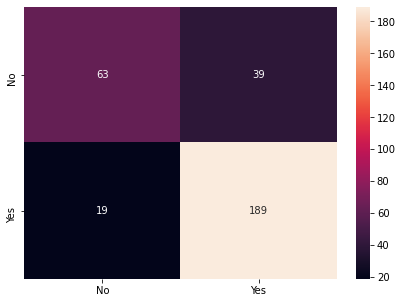

In [117]:
# Confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=cart_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [118]:
# Classification report of train set
print(classification_report(y_test,cart_test_predict))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        42
           1       0.79      0.86      0.82        92

    accuracy                           0.75       134
   macro avg       0.70      0.68      0.69       134
weighted avg       0.74      0.75      0.74       134



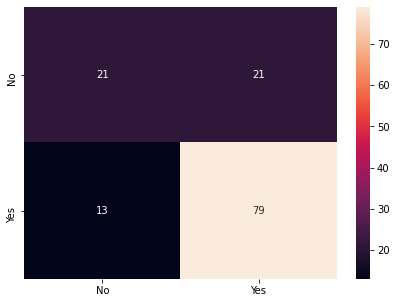

In [119]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=cart_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [120]:
# Calculating proabilities
cart_train_prob=best_grid.predict_proba(x_train)
cart_test_prob=best_grid.predict_proba(x_test)

In [121]:
# Auc Score of train set
cart_train_auc=roc_auc_score(y_train,cart_train_prob[:,1])
cart_train_auc


0.879053544494721

In [122]:
# AUC Score of test set
cart_test_auc=roc_auc_score(y_test,cart_test_prob[:,1])
cart_test_auc


0.7804089026915113

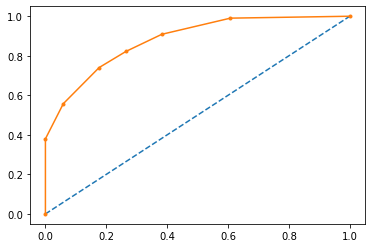

In [123]:
#ROC-Auc Curve of train set
cart_train_fpr,cart_train_tpr,thresholds=roc_curve(y_train,cart_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,marker='.')
plt.show()


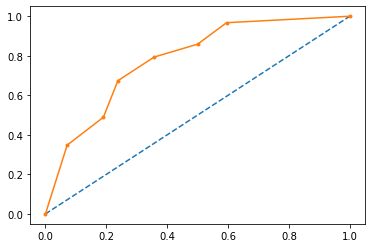

In [124]:
#ROC-Auc Curve of test set
cart_test_fpr,cart_test_tpr,thresholds=roc_curve(y_test,cart_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,marker='.')
plt.show()


# Random Forest Model

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
# Initializing model
rf=RandomForestClassifier(n_estimators=101)

In [127]:
# Fitting train set into the model
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=101)

In [128]:
param_grid={'max_depth':[7,8,9],
           'max_features':[3,4,5],
           'min_samples_leaf':[30,40,50],
           'min_samples_split':[100,150,200],
            'n_estimators':[101,201]}

In [129]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=101),
             param_grid={'max_depth': [7, 8, 9], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [100, 150, 200],
                         'n_estimators': [101, 201]})

In [131]:
grid_search.best_params_


{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 100,
 'n_estimators': 101}

In [132]:
rf1=RandomForestClassifier(max_depth=8,max_features=3,min_samples_leaf= 30,min_samples_split= 100,n_estimators=101)

In [133]:
# Fitting train set into the model after grid search
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=101)

In [134]:
# predicting on train and test set
rf_train_predict=rf1.predict(x_train)
rf_test_predict=rf1.predict(x_test)

In [135]:
# Classification report of train set
print(classification_report(y_train,rf_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.42      0.58       102
           1       0.78      0.99      0.87       208

    accuracy                           0.80       310
   macro avg       0.86      0.70      0.72       310
weighted avg       0.83      0.80      0.77       310



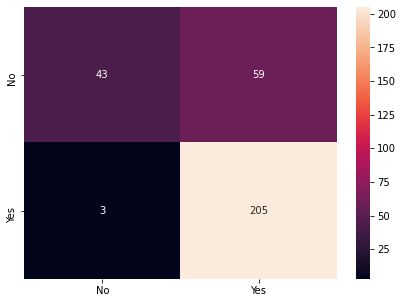

In [136]:
# Confusion matrix of train set
cm=metrics.confusion_matrix(y_true=y_train, y_pred=rf_train_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [137]:
# Classification report of test set
print(classification_report(y_test,rf_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.80      0.96      0.87        92

    accuracy                           0.81       134
   macro avg       0.82      0.72      0.74       134
weighted avg       0.81      0.81      0.79       134



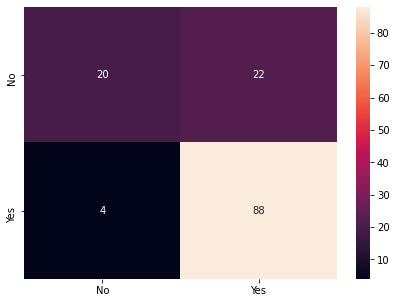

In [138]:
# Confusion matrix of test set
cm=metrics.confusion_matrix(y_true=y_test, y_pred=rf_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [139]:
# Calculating proabilities
rf_train_prob=rf1.predict_proba(x_train)
rf_test_prob=rf1.predict_proba(x_test)

In [140]:
# AUC Score of train set
rf_train_auc=roc_auc_score(y_train,rf_train_prob[:,1])
rf_train_auc


0.8551800527903469

In [141]:
# AUC Score of train set
rf_test_auc=roc_auc_score(y_test,rf_test_prob[:,1])
rf_test_auc


0.8015010351966874

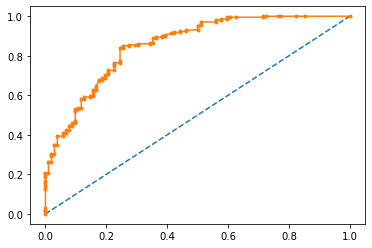

In [142]:
#ROC -AUC Curve of train set
rf_train_fpr,rf_train_tpr,thresholds=roc_curve(y_train,rf_train_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_fpr,rf_train_tpr,marker='.')
plt.show()


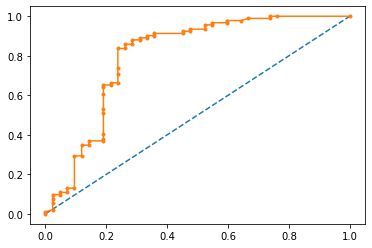

In [143]:
#ROC-AUC Curve of test set
rf_test_fpr,rf_test_tpr,thresholds=roc_curve(y_test,rf_test_prob[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_test_fpr,rf_test_tpr,marker='.')
plt.show()


# 2.4)

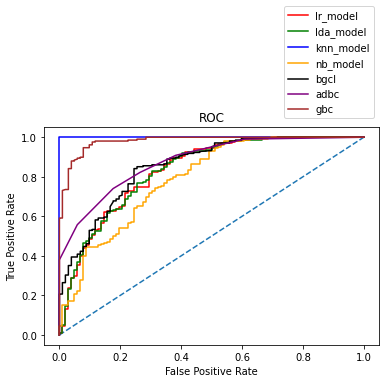

In [144]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_model_train_fpr, lr_model_train_tpr,color='red',label="lr_model")
plt.plot(lda_model_train_fpr,lda_model_train_tpr,color='green',label="lda_model")
plt.plot(knn_model_train_fpr,knn_model_train_tpr,color='blue',label="knn_model")
plt.plot(nb_model_train_fpr, nb_model_train_tpr,color='orange',label="nb_model")
plt.plot(rf_train_fpr,rf_train_tpr,color='black',label="bgcl")
plt.plot(cart_train_fpr,cart_train_tpr,color='purple',label="adbc")
plt.plot(gbc_train_fpr,gbc_train_tpr,color='brown',label="gbc")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

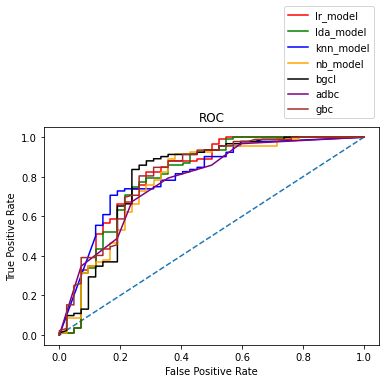

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_model_test_fpr, lr_model_test_tpr,color='red',label="lr_model")
plt.plot(lda_model_test_fpr,lda_model_test_tpr,color='green',label="lda_model")
plt.plot(knn_model_test_fpr,knn_model_test_tpr,color='blue',label="knn_model")
plt.plot(nb_model_test_fpr, nb_model_test_tpr,color='orange',label="nb_model")
plt.plot(rf_test_fpr,rf_test_tpr,color='black',label="bgcl")
plt.plot(cart_test_fpr,cart_test_tpr,color='purple',label="adbc")
plt.plot(gbc_test_fpr,gbc_test_tpr,color='brown',label="gbc")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# Question 2

In [146]:
# Reading cs file
df=pd.read_csv('C:/Users/nicky/Downloads/Shark Tank Companies (2).csv')

In [147]:
# Checking head of data set
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


# 2.1

In [148]:
# Making a new dataframe with deal and description variables
df2=df[['deal','description']]

In [149]:
# Mking a separate data frame by using deal and description variables
df2.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


In [150]:
# Summary of data set
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         495 non-null    bool  
 1   description  495 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.5+ KB


# 2.2

In [151]:
# Making a separate datframe by using deal= false
false_df=df2[df2['deal']==False]
false_df.head()

,deal,description
0,False,Bluetooth device implant for your ear.
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
6,False,A mixed martial arts clothing line looking to ...
7,False,"Attach Noted is a detachable ""arm"" that holds ..."


In [152]:
false_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 493
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         244 non-null    bool  
 1   description  244 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.1+ KB


In [153]:
# Separate dataframe with deal = true
true_df=df2[df2['deal']==True]

In [154]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         251 non-null    bool  
 1   description  251 non-null    object
dtypes: bool(1), object(1)
memory usage: 4.2+ KB


In [155]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [156]:
def tokenization_w(df):
    w_new=[]
    for idx,row in df.iterrows():
        w = row[1]
        w_token=word_tokenize(w)
        w_new.append(w_token)
    return w_new

In [157]:
def flatten(t):
    return [item for sublist in t for item in sublist]

true_df_corpora= tokenization_w(true_df)
true_df_corpora= flatten(true_df_corpora)
print(true_df_corpora)

['Retail', 'and', 'wholesale', 'pie', 'factory', 'with', 'two', 'retail', 'locations', 'in', 'New', 'Jersey', '.', 'Ava', 'the', 'Elephant', 'is', 'a', 'godsend', 'for', 'frazzled', 'parents', 'of', 'young', 'children', 'everywhere', '.', 'This', 'talking', 'medicine', 'dispenser', 'makes', 'it', 'easy', 'to', 'administer', 'medicine', 'to', 'little', 'ones', 'by', 'turning', 'the', 'experience', 'more', 'playful', 'and', 'by', 'providing', 'positive', 'reinforcement', '.', 'One', 'of', 'the', 'first', 'entrepreneurs', 'to', 'pitch', 'on', 'Shark', 'Tank', ',', 'Susan', 'Knapp', 'presented', 'A', 'Perfect', 'Pear', ',', 'her', 'line', 'of', 'pear-focused', 'gourmet', 'food', 'products', '.', 'Sold', 'across', '650', 'retail', 'stores', ',', 'the', 'Perfect', 'Pear', 'product', 'portfolio', 'includes', 'jams', ',', 'jellies', ',', 'spreads', ',', 'tapenades', ',', 'vinegars', ',', 'marinades', ',', 'dressings', 'and', 'many', 'others', ',', 'all', 'designed', 'to', 'showcase', 'the', 'f

In [158]:
false_df_corpora=tokenization_w(false_df)
false_df_corpora=flatten(false_df_corpora)
print(false_df_corpora)

['Bluetooth', 'device', 'implant', 'for', 'your', 'ear', '.', 'Organizing', ',', 'packing', ',', 'and', 'moving', 'services', 'delivered', 'by', 'college', 'women', '.', 'Interactive', 'media', 'centers', 'for', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'and', 'educational', 'information', '.', 'A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'to', 'become', 'the', 'next', 'big', 'brand', 'of', 'active', 'sports', '/', 'streetwear', 'apparel', '.', 'Attach', 'Noted', 'is', 'a', 'detachable', '``', 'arm', "''", 'that', 'holds', 'Post-It', 'notes', 'on', 'the', 'side', 'of', 'a', 'laptop', 'screen', '.', 'A', 'safety', 'device', 'for', 'seatbelts', '.', 'It', 'prevents', 'the', 'driver', 'from', 'starting', 'the', 'vehicle', 'unless', 'the', 'seatbelt', 'is', 'buckled', '.', 'Household', 'items', 'with', 'a', 'twist', ':', 'made', 'from', 'recycled', 'chopsticks', '.', 'Guitars', 'with', 'a', 'folding', 'neck', ',', 'designed', 'to', 'fit',

# 2.3(a)

In [159]:
len(false_df_corpora)

8721

In [160]:
nltk.FreqDist(false_df_corpora)

FreqDist({'.': 430, ',': 373, 'the': 306, 'and': 279, 'to': 221, 'a': 218, 'of': 168, 'in': 117, 'that': 116, 'for': 111, ...})

In [161]:
len(true_df_corpora)

11801

In [162]:
nltk.FreqDist(true_df_corpora)

FreqDist({'.': 589, ',': 563, 'and': 444, 'the': 320, 'a': 291, 'to': 285, 'of': 184, 'is': 150, 'for': 150, 'that': 149, ...})

# 2.3(b)

In [163]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
false_df_small = (w.lower() for w in false_df_corpora) 
false_df_without_sw=[ word for word in false_df_small if word not in stopwords]
print(false_df_without_sw)

['bluetooth', 'device', 'implant', 'ear', 'organizing', 'packing', 'moving', 'services', 'delivered', 'college', 'women', 'interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', 'streetwear', 'apparel', 'attach', 'noted', 'detachable', '``', 'arm', "''", 'holds', 'post-it', 'notes', 'side', 'laptop', 'screen', 'safety', 'device', 'seatbelts', 'prevents', 'driver', 'starting', 'vehicle', 'unless', 'seatbelt', 'buckled', 'household', 'items', 'twist', 'made', 'recycled', 'chopsticks', 'guitars', 'folding', 'neck', 'designed', 'fit', 'backpack', 'overhead', 'compartment', 'airplane', '50', 'state', 'capitals', '50', 'fun', 'minutes', 'efficient', 'entertaining', 'method', 'learn', 'us', 'geography', 'set', 'flash', 'cards', 'combines', 'phonetics', 'cartoons', 'associations', 'keep', 'kids', 'in

In [164]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation+'s')
true_df_small = (w.lower() for w in true_df_corpora) 
true_df_without_sw=[ word for word in true_df_small if word not in stopwords]
print(true_df_without_sw)

['retail', 'wholesale', 'pie', 'factory', 'two', 'retail', 'locations', 'new', 'jersey', 'ava', 'elephant', 'godsend', 'frazzled', 'parents', 'young', 'children', 'everywhere', 'talking', 'medicine', 'dispenser', 'makes', 'easy', 'administer', 'medicine', 'little', 'ones', 'turning', 'experience', 'playful', 'providing', 'positive', 'reinforcement', 'one', 'first', 'entrepreneurs', 'pitch', 'shark', 'tank', 'susan', 'knapp', 'presented', 'perfect', 'pear', 'line', 'pear-focused', 'gourmet', 'food', 'products', 'sold', 'across', '650', 'retail', 'stores', 'perfect', 'pear', 'product', 'portfolio', 'includes', 'jams', 'jellies', 'spreads', 'tapenades', 'vinegars', 'marinades', 'dressings', 'many', 'others', 'designed', 'showcase', 'flavors', 'health', 'benefits', 'pears', 'educational', 'record', 'label', 'publishing', 'house', 'designed', 'get', 'students', 'learning', 'classic', 'works', 'literature', 'battery-operated', 'cooking', 'device', 'siphons', 'juice', 'silicone', 'basting', '

# 2.3(c)

In [165]:
nltk.FreqDist(false_df_without_sw).most_common(4)

[("'s", 69), ('made', 41), ('company', 25), ('also', 20)]

In [166]:
nltk.FreqDist(true_df_without_sw).most_common(4)

[("'s", 80), ('also', 42), ('makes', 32), ('made', 32)]

# 2.3(d)

In [167]:
!pip install wordcloud

In [168]:
from wordcloud import WordCloud

In [169]:
def show_wordcloud (data,title=None):
    wordcloud=WordCloud(background_color='white',max_words=300, max_font_size=40,scale=3,random_state=1).generate(str(data))
    fig=plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
        

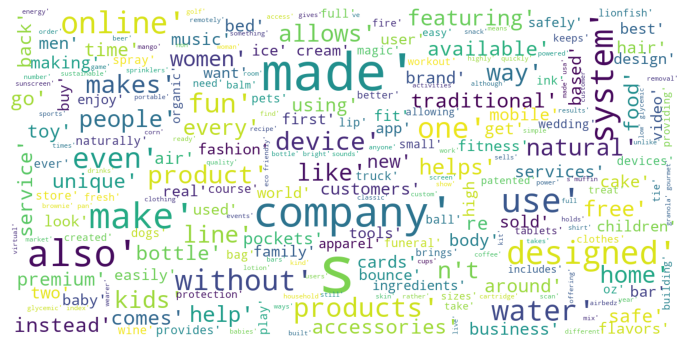

In [170]:
show_wordcloud(false_df_without_sw)

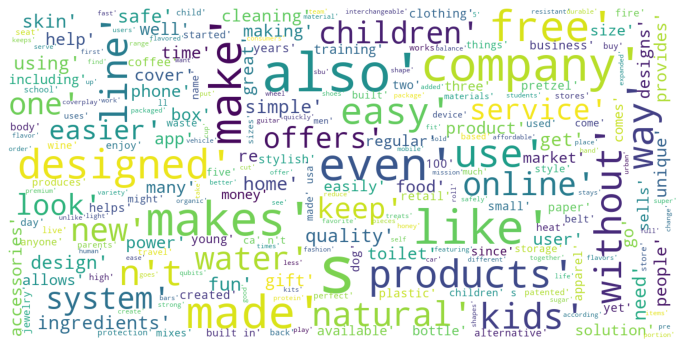

In [171]:
show_wordcloud(true_df_without_sw)